In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("bike_sales_india.csv")
data

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3


**Observations:**

It looks like a used bike / resale market dataset, useful for analysis related to pricing, mileage, usage, and customer behavior.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

In [ ]:
data.nunique()

,0
State,10
Avg Daily Distance (km),5535
Brand,8
Model,40
Price (INR),9863
Year of Manufacture,10
Engine Capacity (cc),901
Fuel Type,3
Mileage (km/l),5404
Owner Type,3


**Data Cleaning:**

1.To check the null values

2.to check duplicate rows and ID

3.To standardize the data

4.To check the Outliers


In [ ]:
data.isnull().sum()

,0
State,0
Avg Daily Distance (km),0
Brand,0
Model,0
Price (INR),0
Year of Manufacture,0
Engine Capacity (cc),0
Fuel Type,0
Mileage (km/l),0
Owner Type,0


**Observations:**

It seems like there is no null values in the dataset So i have moved to next step as checking the duplicate id and rows

In [ ]:
#to see how many duplicates are there in the dataset
data.duplicated().sum()

np.int64(0)

**OUTLIERS:**

To check the Outliers in the numerical festures with the help of Statical datas of numerical features

In [ ]:
data.describe()

,Avg Daily Distance (km),Price (INR),Year of Manufacture,Engine Capacity (cc),Mileage (km/l),Registration Year,Resale Price (INR)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,42.533128,224328.722400,2019.510500,552.695300,67.188926,2020.96510,133828.973998
std,21.676985,100753.660447,2.907668,261.176292,20.891728,2.74897,66613.220382
min,5.010000,50031.000000,2015.000000,100.000000,25.000000,2015.00000,20532.070000
25%,23.907500,137900.250000,2017.000000,327.000000,50.680000,2019.00000,78680.905000
50%,42.480000,223878.000000,2019.000000,553.000000,69.850000,2022.00000,128148.340000
75%,61.352500,311464.250000,2022.000000,780.000000,84.542500,2023.00000,181048.192500
max,80.000000,399981.000000,2024.000000,1000.000000,100.000000,2024.00000,317302.450000


<Axes: xlabel='Price (INR)'>

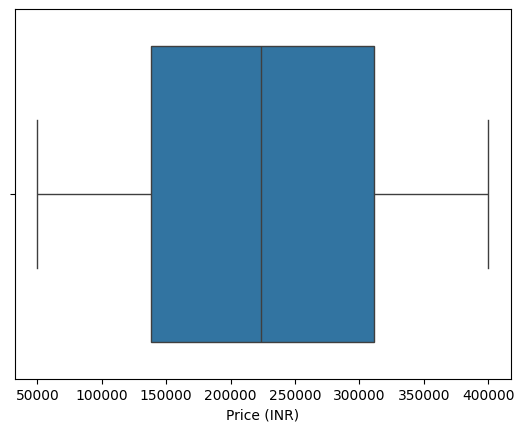

In [ ]:
sns.boxplot(x=data["Price (INR)"])


<Axes: xlabel='Price (INR)'>

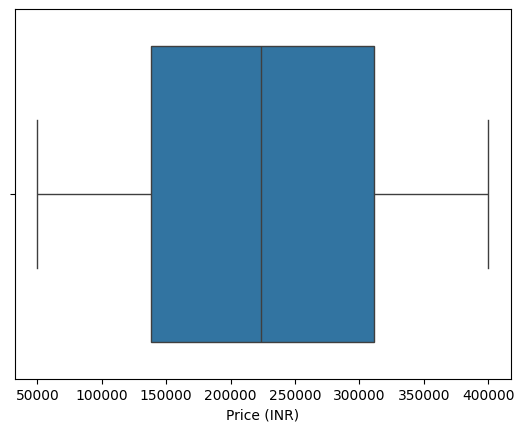

In [ ]:
sns.boxplot(x=data["Price (INR)"])

<Axes: xlabel='Year of Manufacture'>

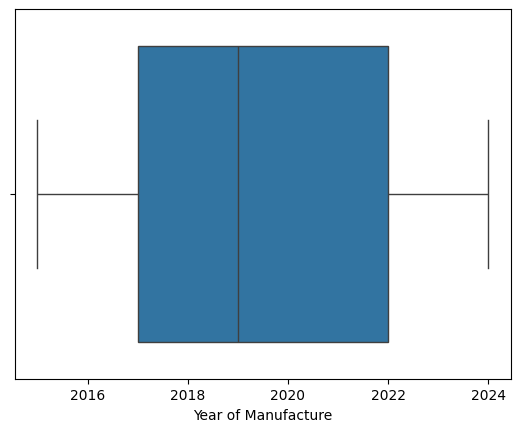

In [ ]:
sns.boxplot(x=data["Year of Manufacture"])

<Axes: xlabel='Engine Capacity (cc)'>

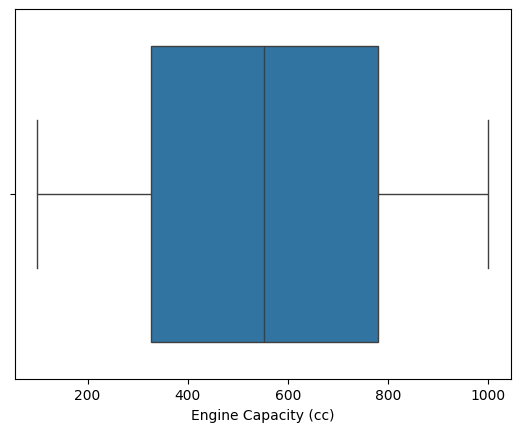

In [ ]:
sns.boxplot(x=data["Engine Capacity (cc)"])

<Axes: xlabel='Mileage (km/l)'>

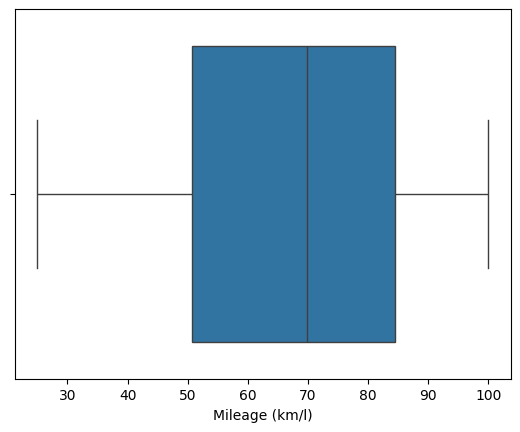

In [ ]:
sns.boxplot(x=data["Mileage (km/l)"])

<Axes: xlabel='Resale Price (INR)'>

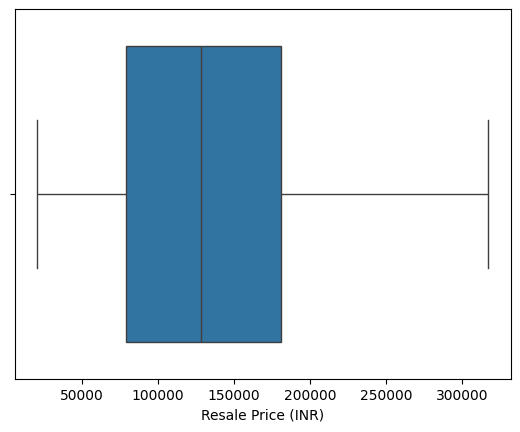

In [ ]:
sns.boxplot(x=data["Resale Price (INR)"])

<Axes: xlabel='Avg Daily Distance (km)'>

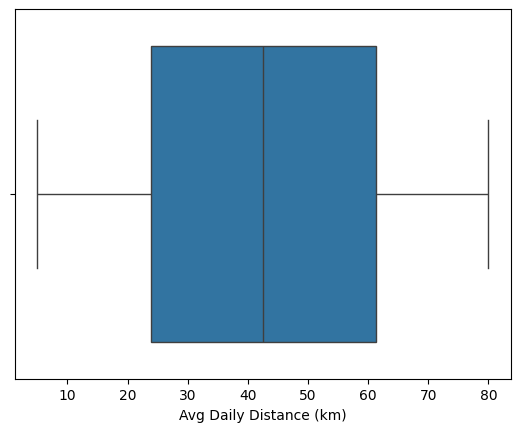

In [ ]:
sns.boxplot(x=data["Avg Daily Distance (km)"])

**Observation:**

Well there no unique IDs in this dataset everything is clear so we can go for the next process exploratory data analysis and also checked for the outliers in the numerical features so the dataset is statistically cleaned and ready for analysis

**EDA- EXPLORATORY DATA ANALYSIS:**

Here i have done a segmentation for the data analysis now need to find the answers for the businees problem and going to visualizse the results in the plots

In [ ]:
display(data)

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3


In [ ]:
data1=data.groupby(["Brand","Model"])["Model"].count()
data1

Brand          Model          
Bajaj          Avenger 220        249
               CT 100             236
               Dominar 400        233
               Platina 110        228
               Pulsar 150         261
Hero           Glamour            258
               HF Deluxe          257
               Passion Pro        247
               Splendor Plus      228
               Xtreme 160R        249
Honda          Activa             230
               CBR 650R           248
               Dio                242
               Shine              244
               Unicorn            257
KTM            125 Duke           231
               250 Duke           269
               390 Adventure      254
               Duke 200           270
               RC 390             248
Kawasaki       Ninja 300          256
               Ninja 400          255
               Versys 650         261
               Vulcan S           267
               Z650               252
Royal Enfield  Classic 350        267
               Himalayan          249
               Hunter 350         259
               Interceptor 650    264
               Meteor 350         214
TVS            Apache RTR 160     227
               Jupiter            226
               NTorq 125          271
               Ronin              252
               Sport              258
Yamaha         FZ V3              256
               Fascino 125        248
               MT-15              267
               R15 V4             233
               Ray ZR             279
Name: Model, dtype: int64

**Observations:**

Here can clearly see that kawasaki9 has the highest listing model among to the other brands



In [ ]:
#What are the top 5 most common bike models in the dataset?
data2=data['Model'].value_counts().head(5)
data2

,count
Model,
Ray ZR,279
NTorq 125,271
Duke 200,270
250 Duke,269
Vulcan S,267


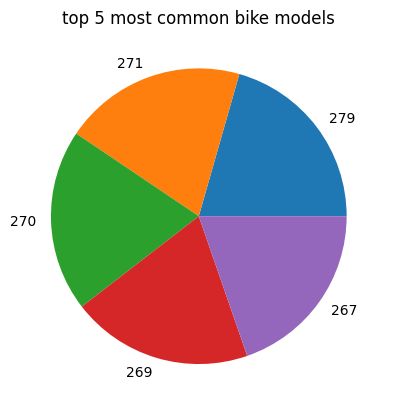

In [ ]:
plt.pie(data2.values,labels=data2)
plt.title("top 5 most common bike models")
plt.show()

**Observations:**

Here we can see that rayZR is the most commonly used bike bynte customers

In [ ]:
#Which brand has the highest average resale price?
data3=data.groupby('Brand')['Resale Price (INR)'].mean().sort_values(ascending=False)
data3

,Resale Price (INR)
Brand,
Bajaj,136662.359793
Yamaha,135534.720912
Hero,134885.063099
Kawasaki,134372.911239
TVS,133496.558485
Royal Enfield,132591.364094
KTM,132002.708381
Honda,131097.482187


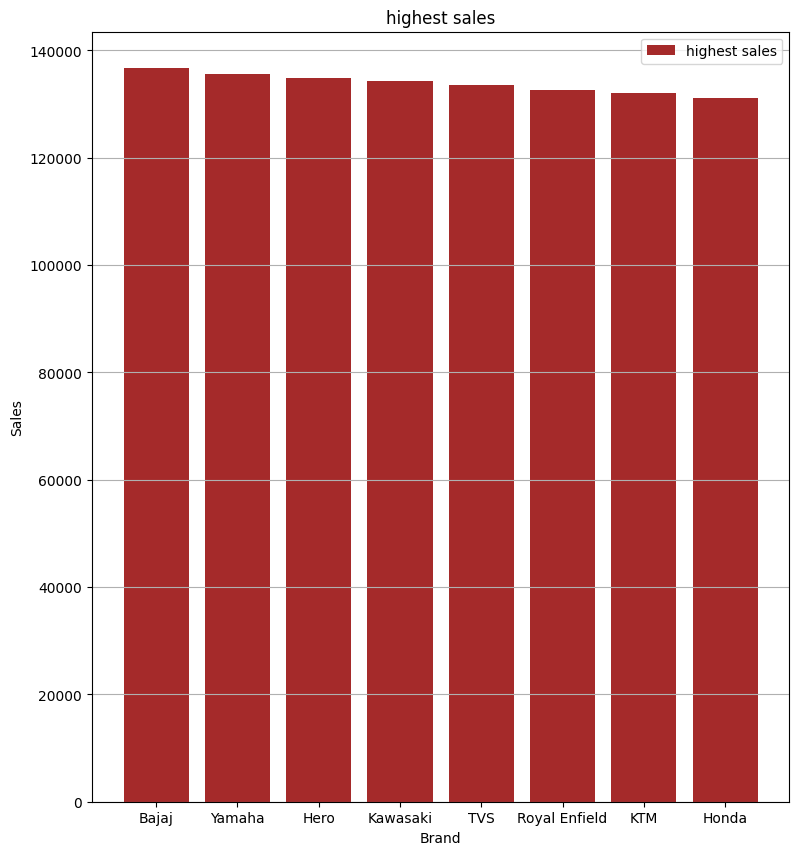

In [ ]:
plt.figure(figsize=(9,10))
plt.bar(data3.index,data3.values,color="brown",label="highest sales")
plt.title("highest sales")
plt.xlabel("Brand")
plt.ylabel("Sales")
plt.grid(axis="y")
plt.legend()
plt.show()

**Observations:**

We can see that Bajaj has the highest resale price among all the brands

In [ ]:
#How does engine capacity (cc) vary across different brands?
data4=data.groupby('Brand')['Engine Capacity (cc)'].min().sort_values(ascending=False)
data4

,Engine Capacity (cc)
Brand,
Bajaj,101
Kawasaki,101
Honda,100
Hero,100
KTM,100
Royal Enfield,100
TVS,100
Yamaha,100


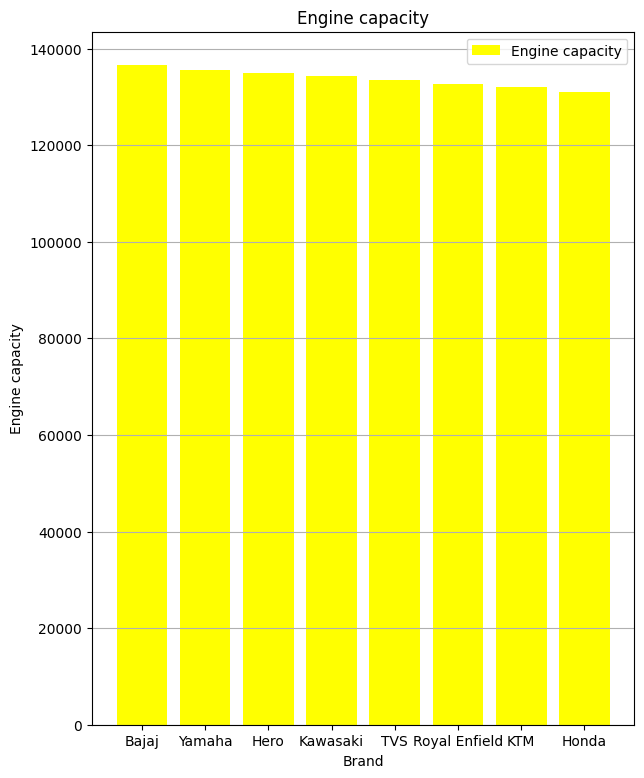

In [ ]:
plt.figure(figsize=(7,9))
plt.bar(data3.index,data3.values,color="yellow",label="Engine capacity")
plt.title("Engine capacity")
plt.xlabel("Brand")
plt.ylabel("Engine capacity")
plt.grid(axis="y")
plt.legend()
plt.show()

**Observations:**

All brands have the same highest engine capacity but hero is slightly differ from the brands

In [ ]:
#Which brand offers the best average mileage?

data5=data.groupby('Brand')['Mileage (km/l)'].mean().sort_values(ascending=False)
data5

,Mileage (km/l)
Brand,
TVS,67.919190
Hero,67.548345
KTM,67.449780
Bajaj,67.206636
Yamaha,67.058995
Kawasaki,66.896266
Honda,66.732588
Royal Enfield,66.711724


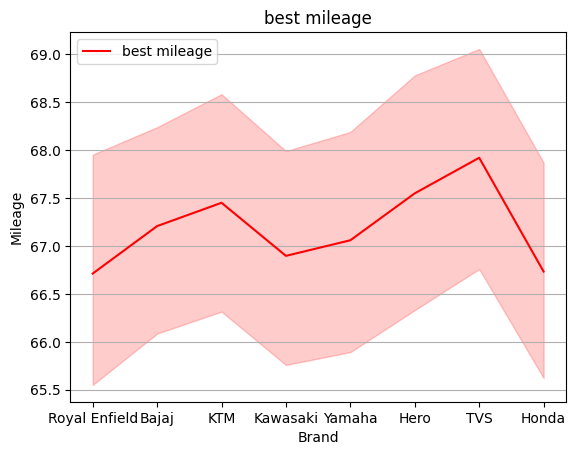

In [ ]:
sns.lineplot(data=data,x="Brand",y="Mileage (km/l)",color="red",label="best mileage")
plt.title("best mileage")
plt.xlabel("Brand")
plt.ylabel("Mileage")
plt.grid(axis="y")
plt.legend()

**Observations:**

Here can visually see that TVS gives the best and highest milege of comparing to other brand and also HERO has small difference compared to TVS it is also the best milege

In [ ]:
#What is the average resale price of bikes in the dataset?
data6=data['Resale Price (INR)'].mean()
data6

np.float64(133828.973998)

**Observations:**

Here we can see that the average resale price is 33828.973998

In [ ]:
#Which bikes have the highest resale value compared to their original price?
data7=data[data['Resale Price (INR)']>data['Price (INR)']]
data7

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier


**Obervations:**

There is no bike has the resale price higher than the original price

In [ ]:
#Do bikes with higher engine capacity have higher resale prices?
data8=data.groupby('Engine Capacity (cc)')["Resale Price (INR)"].max()
data8

,Resale Price (INR)
Engine Capacity (cc),
100,276955.85
101,214995.64
102,284595.32
103,287779.04
104,181425.28
...,...
996,298616.86
997,200267.65
998,222243.52


**Observations:**

YES the engine capacity plays a vital role in pricing of the products

In [ ]:
#How does average daily distance affect resale price?
data9=data.groupby('Avg Daily Distance (km)')["Resale Price (INR)"].mean()
data9

,Resale Price (INR)
Avg Daily Distance (km),
5.01,239777.195
5.02,145886.360
5.03,110302.060
5.04,115025.500
5.06,94257.690
...,...
79.96,232294.520
79.97,127829.565
79.98,112288.988


**Observations:**

No the daily distance is not the factor that affecting the resale price its completely based on age of bikes and km driven

In [ ]:
#Do bikes with higher mileage (km/l) retain better resale value?
data10=data.groupby('Mileage (km/l)')["Resale Price (INR)"].max()
data10

,Resale Price (INR)
Mileage (km/l),
25.00,86669.06
25.01,28811.47
25.03,168936.97
25.06,74392.37
25.08,85466.87
...,...
99.92,143415.55
99.93,165610.57
99.94,128795.98


**Observstions:**

Yes higher milege is important key to increase the resale price


In [ ]:
#Which state has the highest number of bike listings?
data11=data['State'].value_counts()
data11

,count
State,
Punjab,1051
Maharashtra,1030
Rajasthan,1017
Uttar Pradesh,1003
Gujarat,1002
Tamil Nadu,994
Karnataka,982
Delhi,977
Madhya Pradesh,973


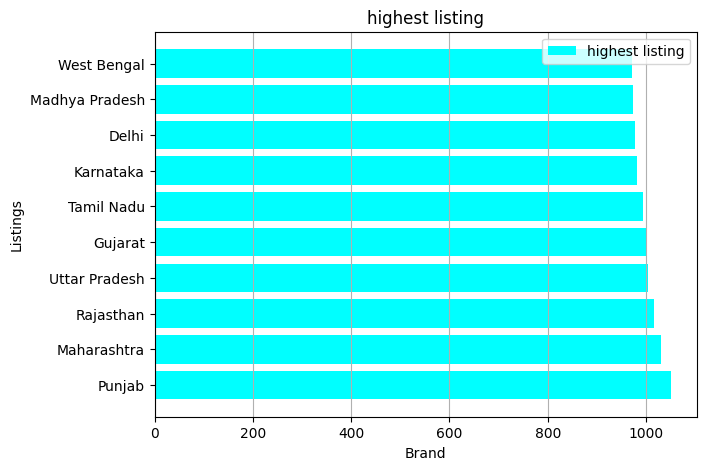

In [ ]:
plt.figure(figsize=(7,5))
plt.barh(data11.index,data11.values,color="cyan",label="highest listing")
plt.title("highest listing")
plt.xlabel("Brand")
plt.ylabel("Listings")
plt.grid(axis="x")
plt.legend()
plt.show()


**Observations:**

here we can see that punjab has the highedt bike counts compared to other states

In [ ]:
#How does resale price vary across different city tiers?
data12=data.groupby('City Tier')['Resale Price (INR)'].mean()
data12

,Resale Price (INR)
City Tier,
Metro,133490.921148
Tier 1,133586.592597
Tier 2,133443.322561
Tier 3,134739.369729


Text(0, 0.5, 'Resale Price')

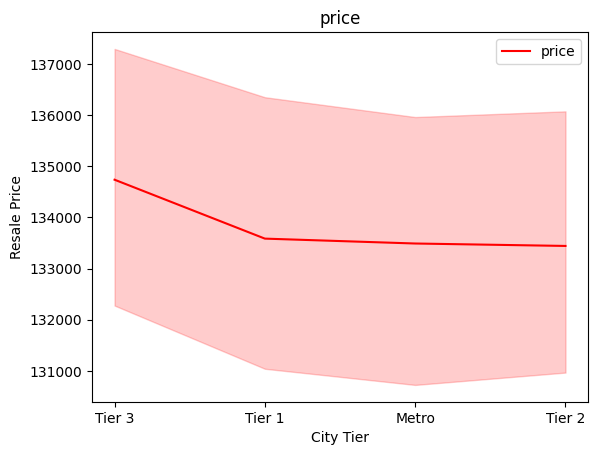

In [ ]:
sns.lineplot(data=data,x="City Tier",y="Resale Price (INR)",color="red",label="price")
plt.title("price")
plt.xlabel("City Tier")
plt.ylabel("Resale Price")

**Observations:**

Not like that each tier does not have any specific value its completely based on bikes

In [ ]:
#Are bikes in Tier-1 cities priced higher than those in Tier-2 or Tier-3 cities?
data13=data.groupby('City Tier')['Price (INR)'].max()
data13

,Price (INR)
City Tier,
Metro,399909
Tier 1,399981
Tier 2,399947
Tier 3,399730


Text(0, 0.5, 'Price')

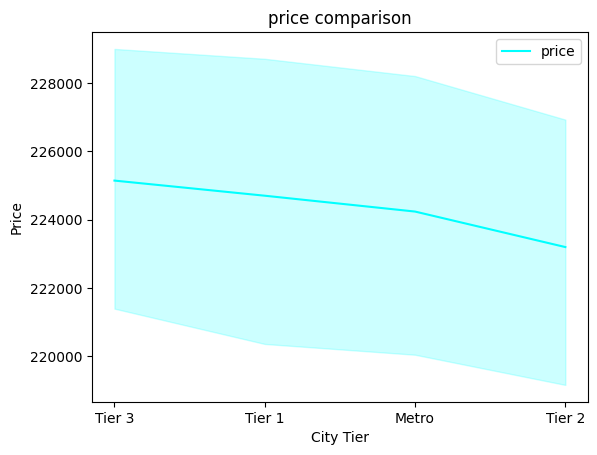

In [ ]:
sns.lineplot(data=data,x="City Tier",y="Price (INR)",color="cyan",label="price")
plt.title("price comparison")
plt.xlabel("City Tier")
plt.ylabel("Price")

**Observations:**

Here we can sse that tier 1 is not higher than the other tires so we cannot assume this its based on specific bike

In [ ]:
#Do first-owner bikes have higher resale prices than second-owner bikes?
data14=data.groupby('Owner Type')['Resale Price (INR)'].mean()
data14

,Resale Price (INR)
Owner Type,
First,134318.877382
Second,133567.409014
Third,133584.417645


Text(0, 0.5, 'Resale Price')

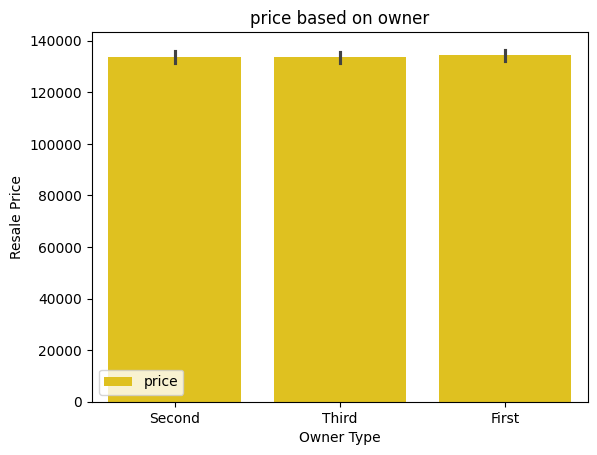

In [ ]:
sns.barplot(data=data,x="Owner Type",y="Resale Price (INR)",color="gold",label="price")
plt.title("price based on owner")
plt.xlabel("Owner Type")
plt.ylabel("Resale Price")

**Observations:**

here we can see that first owner bikes have the highest resale value

In [ ]:
#How does seller type (Dealer vs Individual) affect resale price?
data15=data.groupby('Seller Type')['Resale Price (INR)'].mean()
data15

,Resale Price (INR)
Seller Type,
Dealer,134770.064620
Individual,132874.615231


Text(0, 0.5, 'Resale Price')

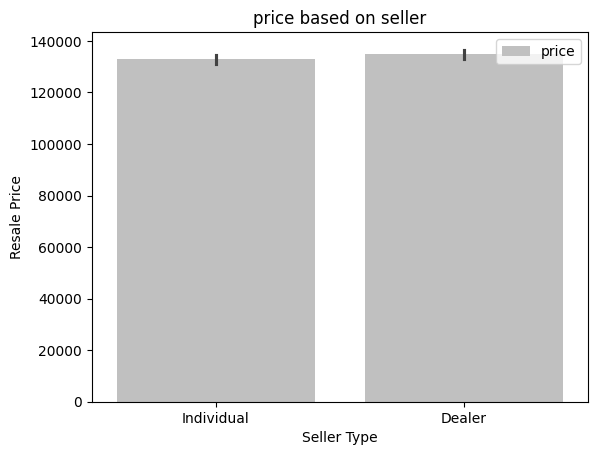

In [ ]:
sns.barplot(data=data,x="Seller Type",y="Resale Price (INR)",color="silver",label="price")
plt.title("price based on seller")
plt.xlabel("Seller Type")
plt.ylabel("Resale Price")

**Observstions:**

Visually we can see that dealers are selling the bikes for higher price compared to individuals

In [ ]:
#Does having active insurance increase the resale value of bikes?
data16=data.groupby('Insurance Status')['Resale Price (INR)'].count()
data16

,Resale Price (INR)
Insurance Status,
Active,3321
Expired,3429
Not Available,3250


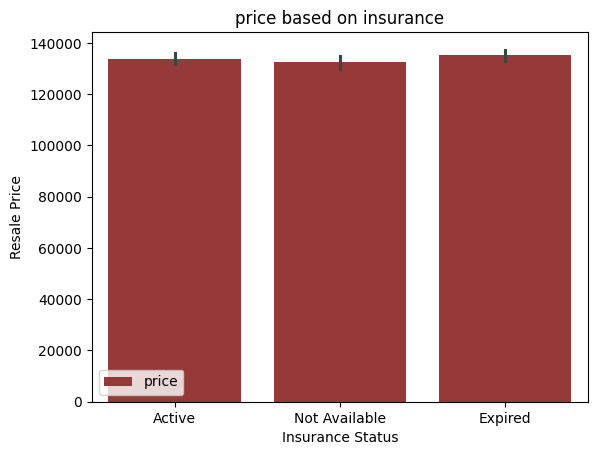

In [ ]:
sns.barplot(data=data,x="Insurance Status",y="Resale Price (INR)",color="brown",label="price")
plt.title("price based on insurance")
plt.xlabel("Insurance Status")
plt.ylabel("Resale Price")
plt.show()


**Obervations:**

We cannot say that insuarance active bike has gone for highest resale price insurance expired bikes have the highest resale values compared to other status bikes